In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import cmath
from scipy.fft import dct, idct

In [2]:
class discCosine(object):


    def __init__(self, k, l, M, N):
        self.k = k
        self.l = l
        self.M = M
        self.N = N

        self.n = np.arange(N)
        self.m = np.arange(M)

        self.dis_cos_2d = np.matmul( np.cos(self.k * cmath.pi / 2/self.M * (2*self.m+1) ).reshape((self.M,1)) ,np.cos(self.l * cmath.pi / 2/self.N * (2*self.n+1)).reshape((1,self.N)) )
        

In [3]:
class inner_prod():
    def __init__(self, x, y):
        self.x=x
        self.y=y
        self.N=np.shape(x)[0]

    def solve(self):
        product = 0        
        for i in range(self.N):
            for j in range(self.N):
                product = product + self.x[i,j] * np.conj(self.y[i,j])
            
        return product

In [4]:
class dct2d():
    def __init__(self, x):
        self.x = x
        self.N = np.shape(x)[1]
        self.M = np.shape(x)[0]
        
    def solve(self):
        X = np.zeros([self.M, self.N], dtype=np.complex)
        for k in range(self.M):
            if k == 0:
                c1 = 1/np.sqrt(2)
            else:
                c1 = 1
                
            for l in range(self.N):
                if l == 0:
                    c2 = 1 / np.sqrt(2)
                else:
                    c2 = 1
                    
                tw_cos = discCosine(k,l,self.M, self.N).dis_cos_2d
                inner_product = inner_prod(self.x, tw_cos)
                X[k, l] =  2 / np.sqrt(self.M)/ np.sqrt(self.N) *c1 *c2 * inner_product.solve()
        return X

In [5]:
class iDCT_2D():
  
    def __init__(self, X):
        self.X = X
    
    def solve(self):
       
        return idct(idct(self.X.T, norm='ortho').T, norm='ortho')
    
    

class dft_2d():
    def __init__(self, x):
        self.x=x
        self.M=np.shape(x)[0]
        self.N=np.shape(x)[1]

    def first(self):
        X=np.zeros([self.M, self.N], dtype=np.complex)
        for m in range(self.M):
            for n in range(self.N):
                for i in range(self.M):
                    for j in range(self.N):
                        X[m,n] = X[m,n] + self.x[i,j]/np.sqrt(self.M*self.N)*np.exp(-1j*2*cmath.pi*(m*i/self.M+n*j/self.N))
        return X



def compress_block(X, K):
  
    X_truncated = np.zeros([8, 8], dtype=np.complex)
    E = np.zeros(64)
    E = abs( X.reshape((1, 64) ))
    index_temp = np.argsort(-E)
    index = np.array(index_temp[:, 0: K])[0]
    for i in np.arange(len(index)):
        index_x = np.int( np.floor(index[i] / 8))
        index_y = np.int( index[i] - index_x * 8)
        X_truncated[index_x, index_y] = X[index_x, index_y]    
    return X_truncated, index
    


def compress_image_DCT(x, K):
   
    N = x.shape[0]
    
    X_compressed = np.zeros([N, N], dtype=np.complex)
    for i in np.arange(0, N+1 - 8, 8):
        for j in np.arange(0, N+1 -8 , 8):
            x_block = x[ i : i + 8, j : j + 8 ]
            block_DCT = dct2d(x_block)
            X_block = block_DCT.solve()
            X_block_truncated, index = compress_block(X_block, K)
            X_compressed[i : i + 8, j : j + 8 ] = X_block_truncated
            
    return X_compressed

def compress_image_DFT(x, K):

    N = x.shape[0]
    
    X_compressed = np.zeros([N, N], dtype=np.complex)
    for i in np.arange(0, N+1 - 8, 8):
        for j in np.arange(0, N+1 -8 , 8):
            x_block = x[ i : i + 8, j : j + 8 ]
            block_DCT = dft_2d(x_block)
            X_block = block_DCT.first()
            X_block_truncated, index = compress_block(X_block, K)
            X_compressed[i : i + 8, j : j + 8 ] = X_block_truncated
            
    return X_compressed
        
            


In [6]:
def q12(img, K):
   
    X_img_DCT = compress_image_DCT(img, K)
    
    plt.imshow(np.log(1+np.abs(X_img_DCT)*100), cmap='gray')
    plt.title('Compressed DCT of the partitioned image')
    plt.colorbar()
    plt.show() 
    
    X_img_DFT = compress_image_DFT(img, K)
    
    plt.imshow(np.log(1+np.abs(X_img_DFT)*100), cmap='gray')
    plt.title('Compressed DFT of the partitioned image')

    plt.colorbar()
    plt.show() 
    
    return X_img_DCT
    
    


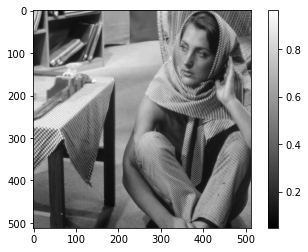

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:48: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_compressed = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1220616604.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros([s

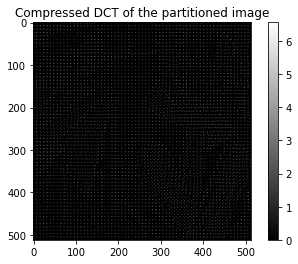

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:63: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_compressed = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros([se

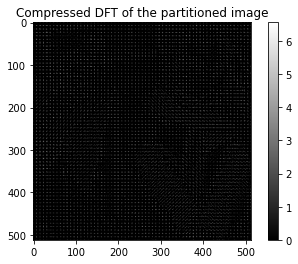

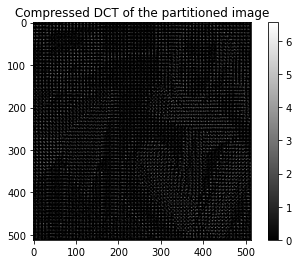

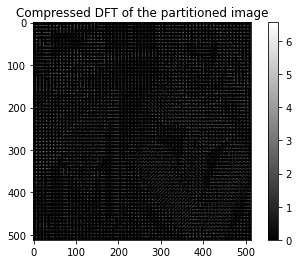

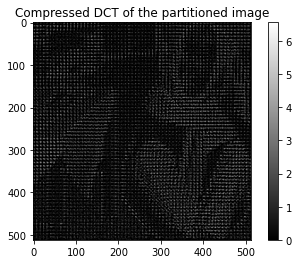

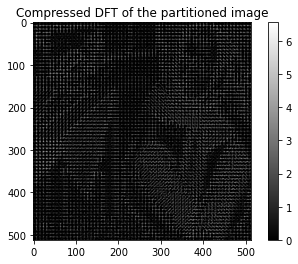

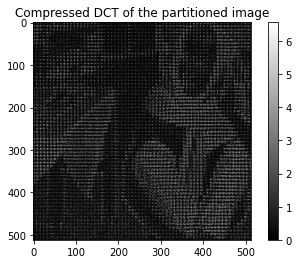

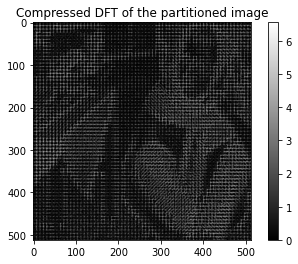

In [8]:
img = mpimg.imread('image2.png')  
    
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()
K_seq = [4,8,16,32]
for i in np.arange(len(K_seq)):
    X_DCT = q12(img, K_seq[i])

In [12]:
def quantization_table(quality):
    Q50 = [ [16, 11, 10, 16, 24, 40, 51, 61],
           [12, 12, 14, 19, 26, 58, 60, 55],
    [ 14, 13, 16, 24, 40, 57, 69, 56],
    [ 14, 17, 22, 29, 51, 87, 80, 62],
    [ 18, 22, 37, 56, 68, 109, 103, 77],
    [ 24, 35, 55, 64, 81, 104, 113, 92],
     [49, 64, 78, 87, 103, 121, 120, 101],
     [72, 92, 95, 98, 112, 100, 103, 99]]
    
    QX = np.zeros((8, 8))
    if quality > 50:
        QX =( Q50 * (np.ones((8,8)) * ( ( 100 - quality ) / 50 ) )).round().astype(np.int32) 
    else:
        QX = (Q50 *( np.ones((8,8)) * ( 50 / quality))).round().astype(np.int32)
         
    return QX



def quantize(QX, block):
       
    return (block /QX).round().astype(np.int32)


def dequantize(QX, block):
         
    return (( block) * QX).astype(np.int32)
    

def q13(quantization):
    img = mpimg.imread('image2.png')  
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.show()
    N = img.shape[0]
    X_quantized = np.zeros([N, N], dtype=np.complex)
    for i in np.arange(0, N-7, 8):
        for j in np.arange(0, N-7, 8):
            x_block = img[ i : i + 8, j : j + 8 ] * 256
            block_DCT = dct2d(x_block)
            X_block = block_DCT.solve()
            quant_block = quantize(quantization, X_block)
            X_quantized[i : i + 8, j : j + 8 ] = quant_block
            
    return X_quantized

In [13]:
def q14_2(quantization, X_quan):
    N = X_quan.shape[0]
    x_dequantized = np.zeros([N, N], dtype=np.complex)
    for i in np.arange(0, N-7, 8):
        for j in np.arange(0, N-7, 8):
            X_block = X_quan[ i : i + 8, j : j + 8 ]
            X_dequan_block = dequantize(quantization, X_block)
            block_iDCT = iDCT_2D(X_dequan_block)
            x_block = block_iDCT.solve()/256
            x_dequantized[i : i + 8, j : j + 8 ] = x_block
    energy_rec = np.amax(x_dequantized)
    x_dequantized /= energy_rec
            
    return x_dequantized

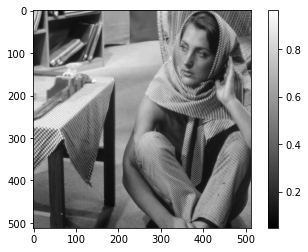

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1007876685.py:37: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_quantized = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1220616604.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros([se

11.791872663589805


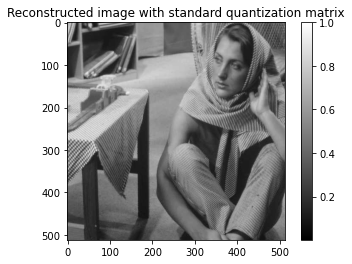

[[ 2  1  1  2  2  4  5  6]
 [ 1  1  1  2  3  6  6  6]
 [ 1  1  2  2  4  6  7  6]
 [ 1  2  2  3  5  9  8  6]
 [ 2  2  4  6  7 11 10  8]
 [ 2  4  6  6  8 10 11  9]
 [ 5  6  8  9 10 12 12 10]
 [ 7  9 10 10 11 10 10 10]]


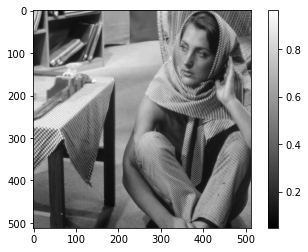

6.776897364584213


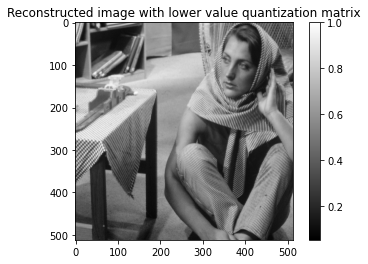

[[ 400  275  250  400  600 1000 1275 1525]
 [ 300  300  350  475  650 1450 1500 1375]
 [ 350  325  400  600 1000 1425 1725 1400]
 [ 350  425  550  725 1275 2175 2000 1550]
 [ 450  550  925 1400 1700 2725 2575 1925]
 [ 600  875 1375 1600 2025 2600 2825 2300]
 [1225 1600 1950 2175 2575 3025 3000 2525]
 [1800 2300 2375 2450 2800 2500 2575 2475]]


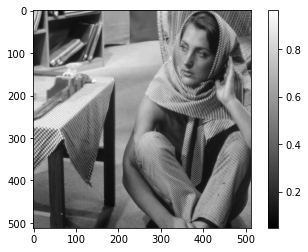

65.55500181777055


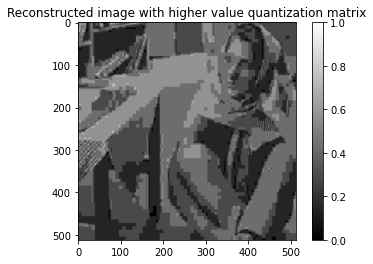

In [14]:
img = mpimg.imread('image2.png')  
quan_tab = quantization_table(50)            
X = q13(quan_tab)
x = q14_2(quan_tab, X) 
plt.imshow(abs(x), cmap='gray')
plt.title('Reconstructed image with standard quantization matrix')
plt.savefig('Recons_jpeg.png')
print(np.linalg.norm(img - abs(x), 2))
plt.colorbar()
plt.show()    

# Compress and reconstruct with a lower value quantization matrix
quan_tab = quantization_table(95)      
print(quan_tab)      
X = q13(quan_tab)
x = q14_2(quan_tab, X) 
plt.imshow(abs(x), cmap='gray')
print(np.linalg.norm(img - abs(x), 2))

plt.title('Reconstructed image with lower value quantization matrix')
plt.savefig('Reconslow_jpeg.png')

plt.colorbar()
plt.show()  

# Compress and reconstruct with a higher value quantization matrix
quan_tab = quantization_table(2)   
print(quan_tab)      

X = q13(quan_tab)
x = q14_2(quan_tab, X) 
plt.imshow(abs(x), cmap='gray')
print(np.linalg.norm(img - abs(x), 2))

plt.title('Reconstructed image with higher value quantization matrix')
plt.savefig('Reconshigh_jpeg.png')

plt.colorbar()
plt.show()  

In [15]:
def q14_1(X):
    
    N = X.shape[0]

    x_reconstruct = np.zeros([N, N], dtype=np.complex)
    for i in np.arange(0, N+1 - 8, 8):
        for j in np.arange(0, N+1 -8 , 8):
            X_block = X[ i : i + 8, j : j + 8 ]
            block_iDCT = iDCT_2D(X_block)
            x_block = block_iDCT.solve()
            x_reconstruct[i : i + 8, j : j + 8 ] = x_block
    x_recons_norm = abs(x_reconstruct) / np.amax(abs(x_reconstruct))
            
    plt.imshow(x_recons_norm, cmap='gray')

    plt.colorbar()
    plt.show() 
    
    return abs(x_reconstruct)

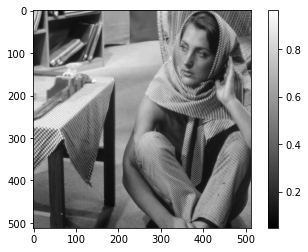

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:48: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_compressed = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1220616604.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros([s

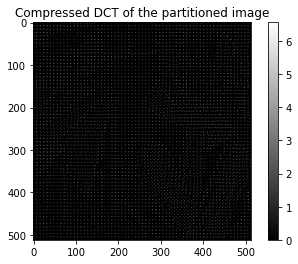

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:63: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_compressed = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/3850410997.py:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros([se

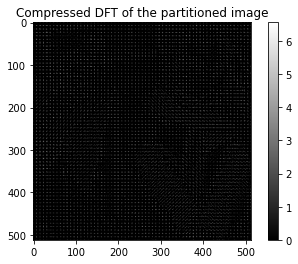

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/2212526072.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_reconstruct = np.zeros([N, N], dtype=np.complex)


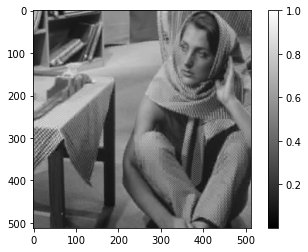

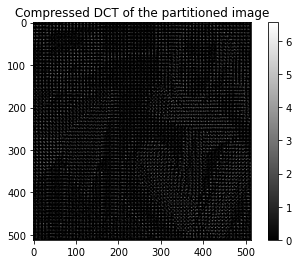

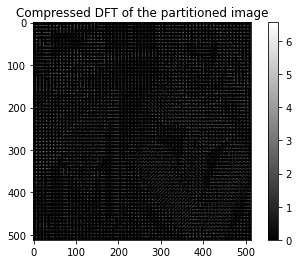

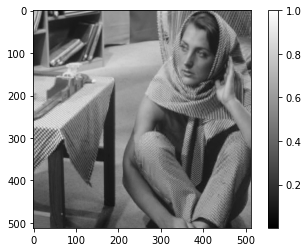

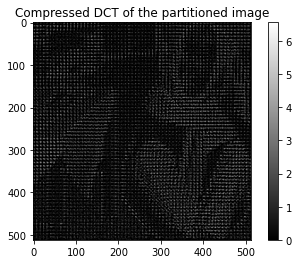

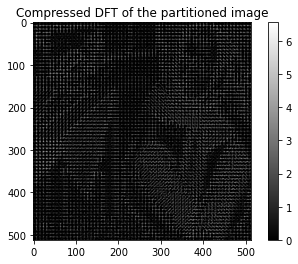

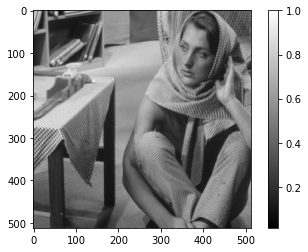

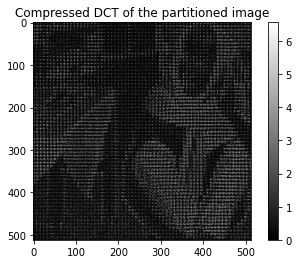

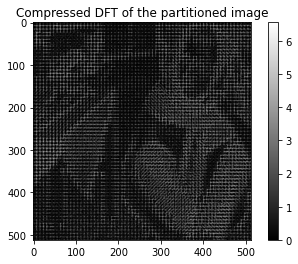

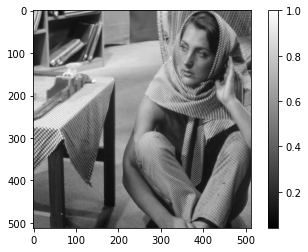

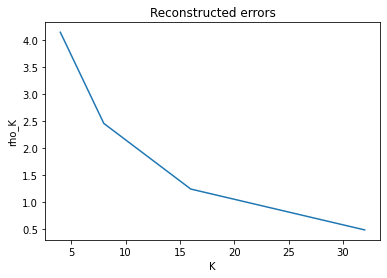

In [17]:
img = mpimg.imread('image2.png')  
    
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()
rho = np.zeros(len(K_seq))
K_seq = [4,8,16,32]
for i in np.arange(len(K_seq)):
    X_DCT = q12(img, K_seq[i])
    x_K = q14_1(X_DCT)
    rho[i] = np.linalg.norm(img - x_K, 2)
    
plt.plot(K_seq, rho)
plt.title('Reconstructed errors')
plt.savefig('recons_error.png')
plt.xlabel('K')
plt.ylabel('rho_K')
plt.show()

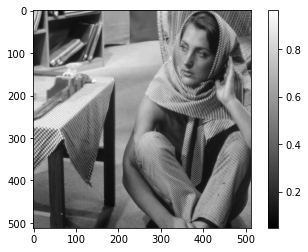

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1007876685.py:37: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_quantized = np.zeros([N, N], dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_36207/1220616604.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros([se

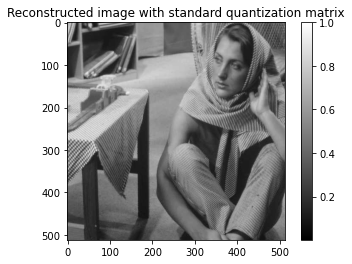

[[ 2  1  1  2  2  4  5  6]
 [ 1  1  1  2  3  6  6  6]
 [ 1  1  2  2  4  6  7  6]
 [ 1  2  2  3  5  9  8  6]
 [ 2  2  4  6  7 11 10  8]
 [ 2  4  6  6  8 10 11  9]
 [ 5  6  8  9 10 12 12 10]
 [ 7  9 10 10 11 10 10 10]]


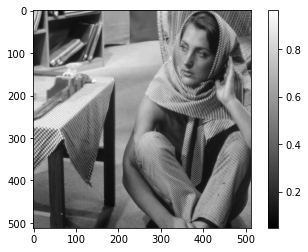

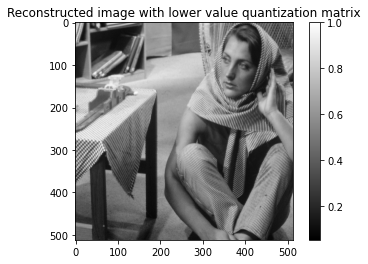

[[ 400  275  250  400  600 1000 1275 1525]
 [ 300  300  350  475  650 1450 1500 1375]
 [ 350  325  400  600 1000 1425 1725 1400]
 [ 350  425  550  725 1275 2175 2000 1550]
 [ 450  550  925 1400 1700 2725 2575 1925]
 [ 600  875 1375 1600 2025 2600 2825 2300]
 [1225 1600 1950 2175 2575 3025 3000 2525]
 [1800 2300 2375 2450 2800 2500 2575 2475]]


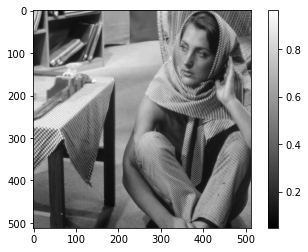

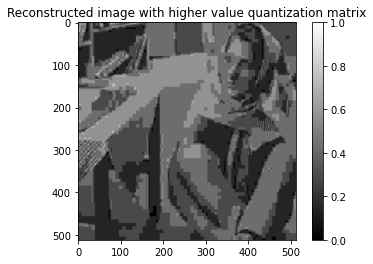

In [18]:
    img = mpimg.imread('image2.png')  

    quan_tab = quantization_table(50)
    X = q13(quan_tab)
    x = q14_2(quan_tab, X) 
    plt.imshow(abs(x), cmap='gray')
    plt.title('Reconstructed image with standard quantization matrix')
    plt.savefig('Recons_jpeg.png')
    error_1 = np.linalg.norm(img - abs(x), 2)
    plt.colorbar()
    plt.show()    
    
    # Compress and reconstruct with a lower value quantization matrix
    quan_tab = quantization_table(95)
    print(quan_tab)      
    X = q13(quan_tab)
    x = q14_2(quan_tab, X) 
    plt.imshow(abs(x), cmap='gray')
    error_2 = np.linalg.norm(img - abs(x), 2)

    plt.title('Reconstructed image with lower value quantization matrix')
    plt.savefig('Reconslow_jpeg.png')

    plt.colorbar()
    plt.show()
    
    # Compress and reconstruct with a higher value quantization matrix
    quan_tab = quantization_table(2)   
    print(quan_tab)      
         
    X = q13(quan_tab)
    x = q14_2(quan_tab, X) 
    plt.imshow(abs(x), cmap='gray')
    error_3 = np.linalg.norm(img - abs(x), 2)

    plt.title('Reconstructed image with higher value quantization matrix')
    plt.savefig('Reconshigh_jpeg.png')

    plt.colorbar()
    plt.show()  